In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

api_key = os.getenv('CENSUS_API_KEY')

In [3]:
url = "https://api.census.gov/data/2021/acs/acs1"
params = {
    'get': 'NAME,B15003_001E,B15003_022E',
    'for': 'state:*',
    'key': api_key
}


In [4]:
response = requests.get(url, params=params)
response.status_code

200

In [5]:
data = response.json()
data[:10]

[['NAME', 'B15003_001E', 'B15003_022E', 'state'],
 ['Alabama', '3451208', '572276', '01'],
 ['Puerto Rico', '2401409', '493356', '72'],
 ['Arizona', '4980297', '985673', '04'],
 ['Arkansas', '2037763', '324137', '05'],
 ['California', '26909869', '5958030', '06'],
 ['Colorado', '4044182', '1107309', '08'],
 ['Connecticut', '2534376', '587690', '09'],
 ['Delaware', '711104', '146295', '10'],
 ['District of Columbia', '478774', '120771', '11']]

In [6]:
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,NAME,B15003_001E,B15003_022E,state
0,Alabama,3451208,572276,01
1,Puerto Rico,2401409,493356,72
2,Arizona,4980297,985673,04
3,Arkansas,2037763,324137,05
4,California,26909869,5958030,06


In [7]:
column_rename = {
    'NAME': 'State',
    'B15003_001E': 'Adults',
    'B15003_022E': 'CollegeGraduates'
}
df = df.rename(columns=column_rename)
df = df.drop(columns='state')
df = df.astype({
    'Adults': int,
    'CollegeGraduates': int
})
df.head()

,State,Adults,CollegeGraduates
0,Alabama,3451208,572276
1,Puerto Rico,2401409,493356
2,Arizona,4980297,985673
3,Arkansas,2037763,324137
4,California,26909869,5958030


In [8]:
df['CollegeGraduateRate'] = df['CollegeGraduates'] / df['Adults']
df.head()

,State,Adults,CollegeGraduates,CollegeGraduateRate
0,Alabama,3451208,572276,0.165819
1,Puerto Rico,2401409,493356,0.205444
2,Arizona,4980297,985673,0.197915
3,Arkansas,2037763,324137,0.159065
4,California,26909869,5958030,0.221407


In [9]:
df = df.sort_values('CollegeGraduateRate', ascending=False)
df.head()

,State,Adults,CollegeGraduates,CollegeGraduateRate
5,Colorado,4044182,1107309,0.273803
45,Vermont,462705,120373,0.260151
30,New Jersey,6474427,1664353,0.257066
23,Minnesota,3898742,993883,0.254924
21,Massachusetts,4934755,1250748,0.253457


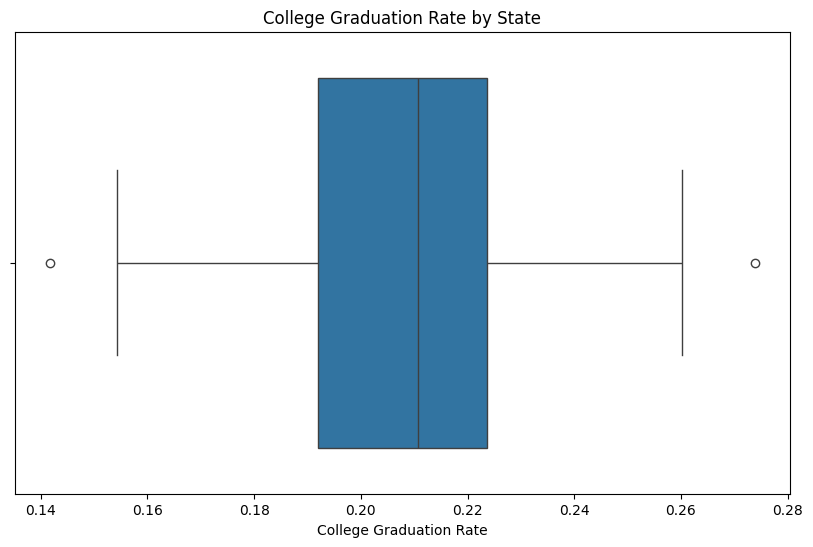

In [10]:
# make box plot of college graduation rate
fig, ax  = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='CollegeGraduateRate', ax=ax)
ax.set_title('College Graduation Rate by State')
ax.set_xlabel('College Graduation Rate')
plt.show()

In [14]:
top_5_states = df['State'].head()
bottom_5_states = df['State'].tail()
for_plot = pd.concat([top_5_states, bottom_5_states])
for_plot.head()

5          Colorado
45          Vermont
30       New Jersey
23        Minnesota
21    Massachusetts
Name: State, dtype: object

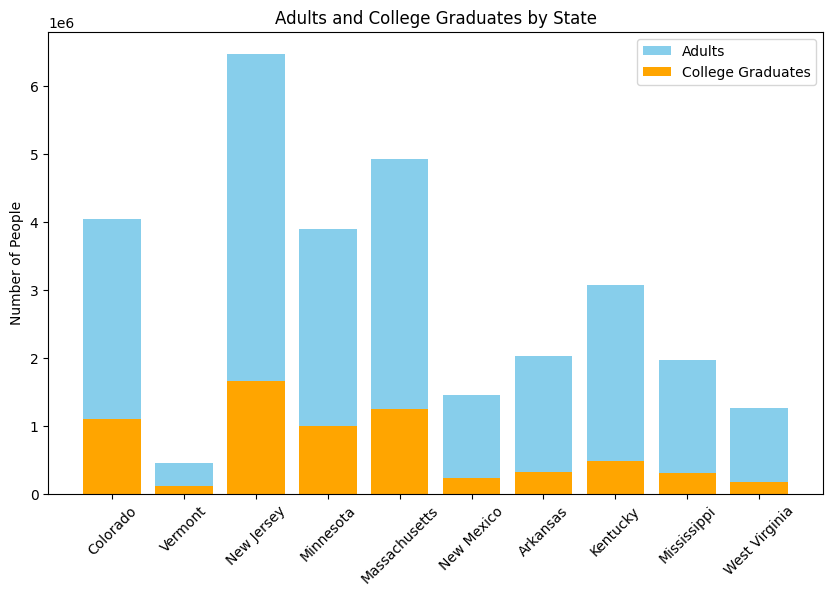

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(len(for_plot)), df.loc[for_plot.index, 'Adults'], color='skyblue')
ax.bar(np.arange(len(for_plot)), df.loc[for_plot.index, 'CollegeGraduates'], color='orange')
ax.set_xticks(np.arange(len(for_plot)))
ax.set_xticklabels(for_plot, rotation=45)
ax.set_title('Adults and College Graduates by State')
ax.set_ylabel('Number of People')
ax.legend(['Adults', 'College Graduates'])
plt.show()

In [16]:
electoral_votes = {
    'ALABAMA': 9,
    'ALASKA': 3,
    'ARIZONA': 11,
    'ARKANSAS': 6,
    'CALIFORNIA': 54,
    'COLORADO': 10,
    'CONNECTICUT': 7,
    'DELAWARE': 3,
    'DISTRICT OF COLUMBIA': 3,
    'FLORIDA': 30,
    'GEORGIA': 16,
    'HAWAII': 4,
    'IDAHO': 4,
    'ILLINOIS': 19,
    'INDIANA': 11,
    'IOWA': 6,
    'KANSAS': 6,
    'KENTUCKY': 8,
    'LOUISIANA': 8,
    'MAINE': 4,
    'MARYLAND': 10,
    'MASSACHUSETTS': 11,
    'MICHIGAN': 15,
    'MINNESOTA': 10,
    'MISSISSIPPI': 6,
    'MISSOURI': 10,
    'MONTANA': 4,
    'NEBRASKA': 5,
    'NEVADA': 6,
    'NEW HAMPSHIRE': 4,
    'NEW JERSEY': 14,
    'NEW MEXICO': 5,
    'NEW YORK': 28,
    'NORTH CAROLINA': 16,
    'NORTH DAKOTA': 3,
    'OHIO': 17,
    'OKLAHOMA': 7,
    'OREGON': 8,
    'PENNSYLVANIA': 19,
    'RHODE ISLAND': 4,
    'SOUTH CAROLINA': 9,
    'SOUTH DAKOTA': 3,
    'TENNESSEE': 11,
    'TEXAS': 40,
    'UTAH': 6,
    'VERMONT': 3,
    'VIRGINIA': 13,
    'WASHINGTON': 12,
    'WEST VIRGINIA': 4,
    'WISCONSIN': 10,
    'WYOMING': 3
}

In [25]:
states = df['State'].str.upper().to_list()
states_to_electorals = []
for state, elects in electoral_votes.items():
    state_data = df[df['State'].str.upper() == state]
    adults = state_data['Adults'].values[0]
    ratio = adults / elects
    states_to_electorals.append((state, elects, ratio))
    
states_to_electorals = pd.DataFrame(states_to_electorals, columns=['State', 'ElectoralVotes', 'AdultsPerElectoral'])
states_to_electorals = states_to_electorals.sort_values('AdultsPerElectoral', ascending=False)
states_to_electorals.head(10)
    
    



,State,ElectoralVotes,AdultsPerElectoral
9,FLORIDA,30,525404.066667
32,NEW YORK,28,499539.071429
4,CALIFORNIA,54,498330.907407
38,PENNSYLVANIA,19,482207.631579
43,TEXAS,40,480617.200000
35,OHIO,17,477527.823529
22,MICHIGAN,15,464793.000000
30,NEW JERSEY,14,462459.071429
13,ILLINOIS,19,459510.368421
46,VIRGINIA,13,457128.615385


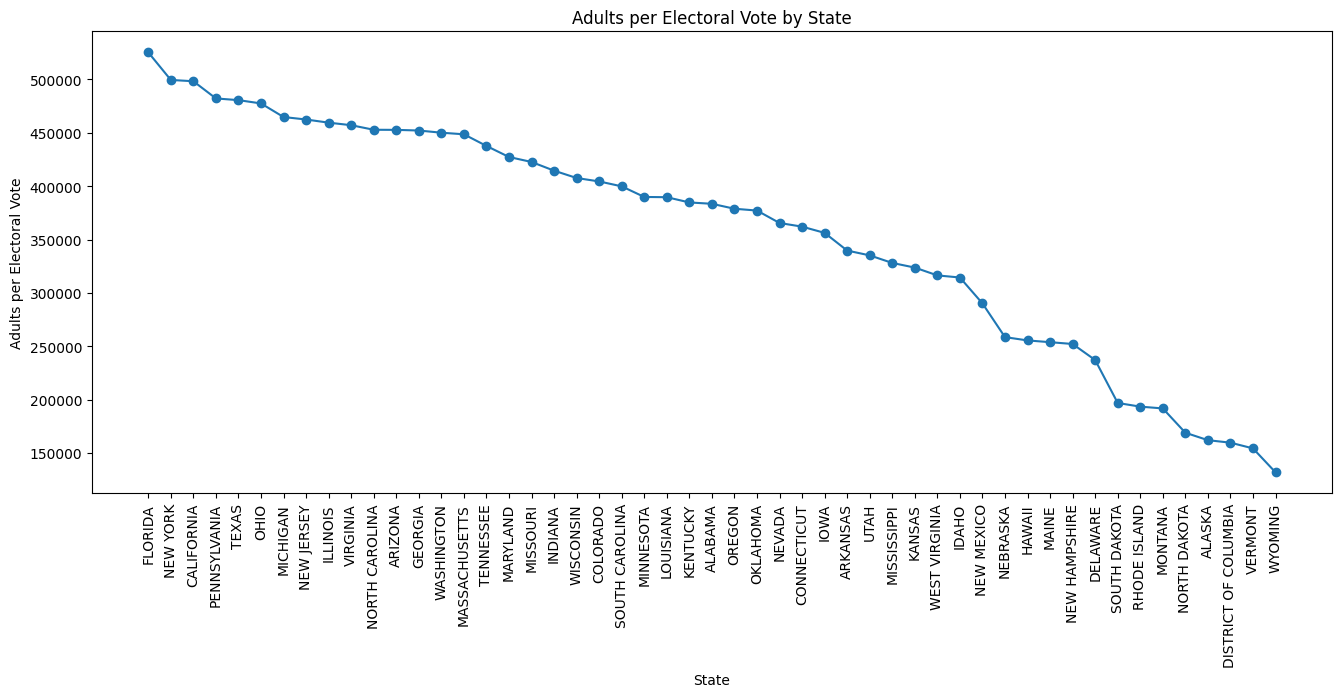

In [29]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(states_to_electorals['State'], states_to_electorals['AdultsPerElectoral'], marker='o')
ax.set_title('Adults per Electoral Vote by State')
ax.set_xlabel('State')
ax.set_ylabel('Adults per Electoral Vote')
ax.set_xticks(np.arange(len(states_to_electorals)))
ax.set_xticklabels(states_to_electorals['State'], rotation=90)
plt.show()